In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_circles
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import math
import random

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


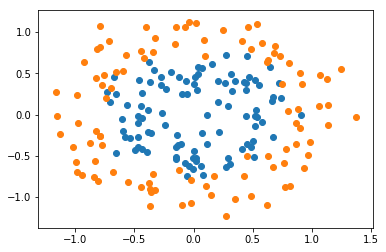

In [2]:
data = make_circles(200, noise = 0.15, factor=0.5)
plt.scatter(data[0][data[1] == 1][:,0], data[0][data[1] == 1][:,1])
plt.scatter(data[0][data[1] == 0][:,0], data[0][data[1] == 0][:,1])
plt.show()

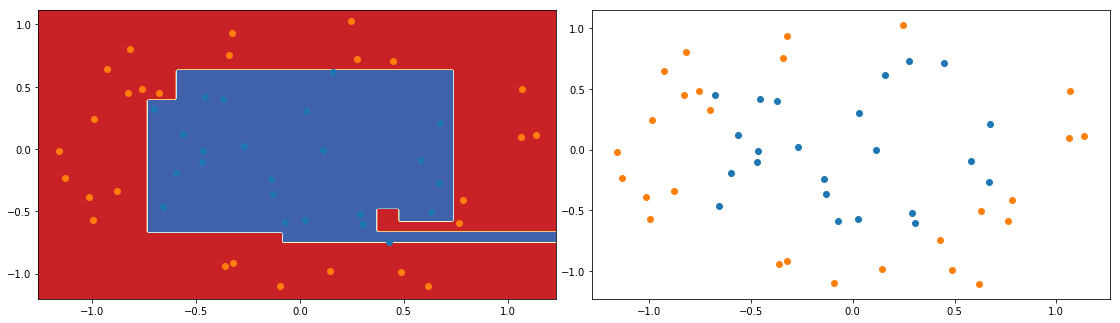

0.88


In [3]:
data_train, data_test, target_train, target_test = train_test_split(data[0], data[1], random_state=0)

tree = DecisionTreeClassifier(max_depth=None)
tree.fit(data_train, target_train)
predict = tree.predict(data_test)
fig,(ax1, ax2) =plt.subplots(1, 2, figsize=(16,5))

x_min, x_max = data_test[:, 0].min() - .1, data_test[:, 0].max() + .1
y_min, y_max = data_test[:, 1].min() - .1, data_test[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax1.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

ax1.scatter(data_test[predict == 1][:,0], data_test[predict == 1][:,1])
ax1.scatter(data_test[predict == 0][:,0], data_test[predict == 0][:,1])

ax2.scatter(data_test[target_test == 1][:,0], data_test[target_test == 1][:,1])
ax2.scatter(data_test[target_test == 0][:,0], data_test[target_test == 0][:,1])
plt.show()

print(accuracy_score(y_pred=predict, y_true=target_test))

In [4]:
class DecisTree():
    def __init__(self, max_depth=None):
        self.max_depth= max_depth
        self.left_tree = 0
        self.right_tree = 0
        self.porog = 0
        self.feature = -1
        self.predict_class = -1
        
    
    def entropy(self, y):
        """расчет энтропии Шеннона"""
        cnt = len(y)
        cnt1 = y.sum()
        cnt0 = cnt - cnt1;
        entropy = 0
        for i in y:
            if(i == 0):
                entropy -= cnt0/cnt * math.log(cnt0/cnt)
            elif(i == 1):
                entropy -= cnt1/cnt * math.log(cnt1/cnt)
        return entropy
    
    def del_feature(self, x, y):
        """ Определение оптимального разбиения по признаку х.
            Минимизирует энтропию."""
        entropy = self.entropy(y)
        porog = None
        for i in x:
            left_entr = self.entropy(y[x < i])*float(len(y[x < i])/len(y))
            right_entr = self.entropy(y[x >= i])*float(len(y[x >= i])/len(y))
            if(entropy > left_entr + right_entr):
                entropy = left_entr + right_entr
                porog = i
        return {'entropy': entropy, 'porog':porog}
                
    
    def fit(self, X, Y):
        """Обучение (нахождение оптимального разбиения) для листа дерева."""
        feature = 0
        min_entropy = 10000000;
        porog = 0
        k = 0
        I = np.arange(X.shape[1])
        random.shuffle(I)
        for i in I:
            entr = self.del_feature(X[:,i], Y)['entropy']
            if(self.del_feature(X[:,i], Y)['porog'] != None and (self.max_depth != 0 or self.max_depth == None)):
                if(min_entropy > entr):
                    min_entropy = entr
                    porog = self.del_feature(X[:,i], Y)['porog']
                    feature = k
            else:
                self.predict_class = 0 if Y.sum() < len(Y) - Y.sum() else 1
                return
            
            k += 1
        self.porog = porog
        self.feature = feature
        self.left_tree = DecisTree(self.max_depth - 1 if self.max_depth != None else None)
        self.left_tree.fit(X[X[:, feature] < porog], Y[X[:, feature] < porog])
        self.right_tree = DecisTree(self.max_depth - 1 if self.max_depth != None else None)
        self.right_tree.fit(X[X[:, feature] >= porog], Y[X[:, feature] >= porog])

        
    def predict(self, X):
        """Определе принадежности примеров к одному из классов"""
        if(self.predict_class != -1):
            return np.array([self.predict_class]*X.shape[0])
        else:
            tmp = np.array([-1]*X.shape[0])
            left = self.left_tree.predict(X[X[:, self.feature] < self.porog])
            left_ind = np.arange(len(tmp))[X[:, self.feature] < self.porog]
            j = 0
            for i in left_ind:
                tmp[i] = left[j]
                j += 1
            right = self.right_tree.predict(X[X[:, self.feature] >= self.porog])
            right_ind = np.arange(len(tmp))[X[:, self.feature] >= self.porog]
            j = 0
            for i in right_ind:
                tmp[i] = right[j]
                j += 1
            return tmp

0.9


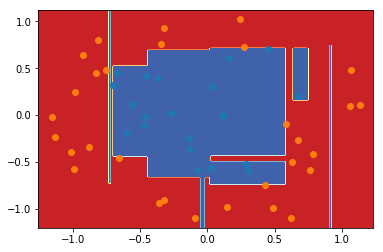

In [5]:
my_tree = DecisTree()
my_tree.fit(data_train, target_train)
print(accuracy_score(y_pred=my_tree.predict(data_test), y_true=target_test))

x_min, x_max = data_test[:, 0].min() - .1, data_test[:, 0].max() + .1
y_min, y_max = data_test[:, 1].min() - .1, data_test[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = my_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.scatter(data_test[my_tree.predict(data_test) == 1][:,0], data_test[my_tree.predict(data_test) == 1][:,1])
plt.scatter(data_test[my_tree.predict(data_test) == 0][:,0], data_test[my_tree.predict(data_test) == 0][:,1])
plt.show()